<a href="https://colab.research.google.com/github/mateuszxx89/computere-vision-course/blob/main/Analiza_Wykresow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -upgrade opencv-python


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [4]:
!pip install opencv-python

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import imutils

In [6]:
print(cv2.__version__)

4.10.0


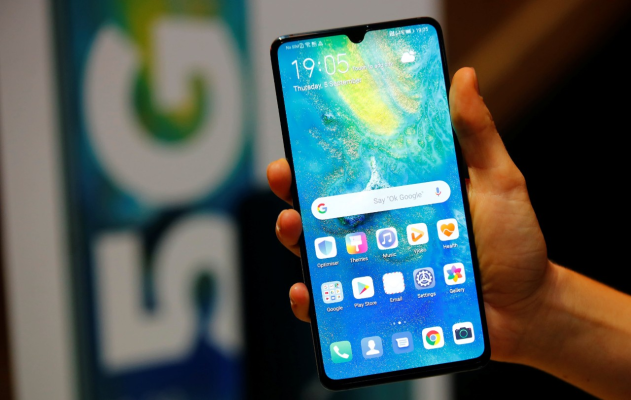

In [23]:
image=cv2.imread('phone.jpg')
image=imutils.resize(image,height=400)
cv2_imshow(image)

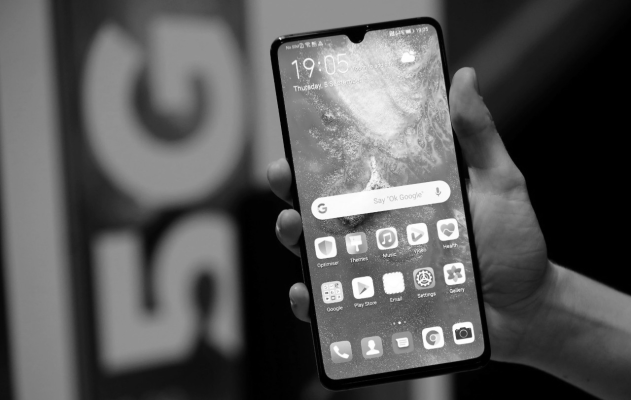

In [24]:
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

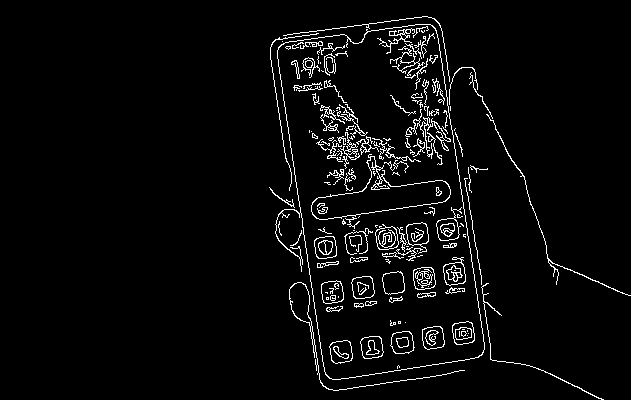

In [25]:
edges1 = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges1)

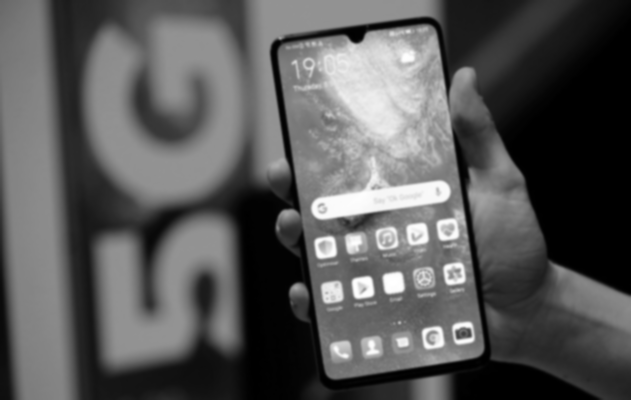

In [26]:
gray_image = cv2.GaussianBlur(src=gray_image, ksize=(5,5), sigmaX=0)
cv2_imshow(gray_image)

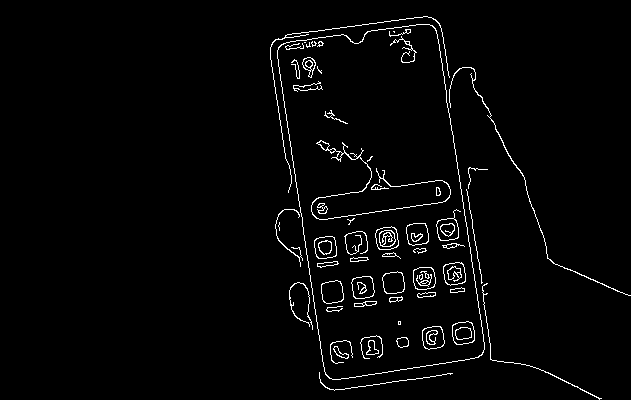

In [29]:
edges = cv2.Canny(image=gray_image, threshold1=50, threshold2=200)
cv2_imshow(edges)

In [30]:
contours = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

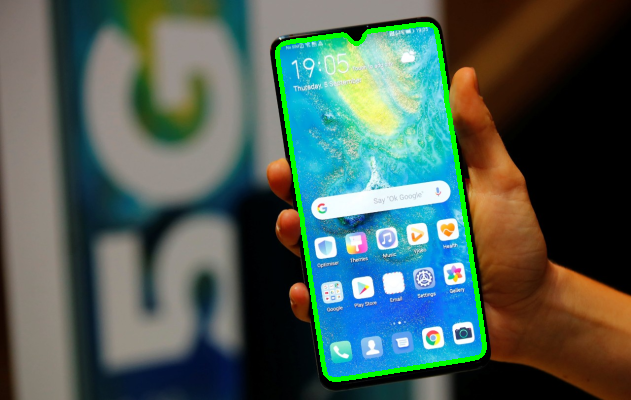

In [32]:
cnt1 = cv2.drawContours(image.copy(), [contours[0]],-1,(0,255,0),3)
cv2_imshow(cnt1)

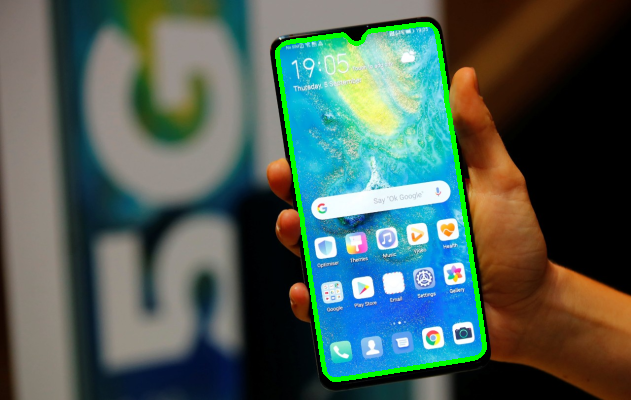

In [33]:
cnt2 = cv2.drawContours(image.copy(), [contours[1]],-1,(0,255,0),3)
cv2_imshow(cnt2)

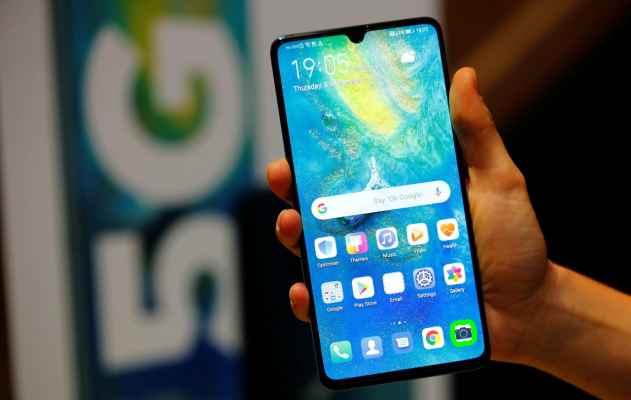

In [34]:
cnt3 = cv2.drawContours(image.copy(), [contours[3]],-1,(0,255,0),3)
cv2_imshow(cnt3)

In [36]:
screen_contorus = None
for cont in contours:
  perimeter = cv2.arcLength(cont, True)
  approx = cv2.approxPolyDP(cont, 0.015 * perimeter, True)
  if len(approx) == 4:
    screen_contorus = approx
    break

In [37]:
screen_contorus

array([[[429,  24]],

       [[277,  50]],

       [[332, 379]],

       [[484, 349]]], dtype=int32)

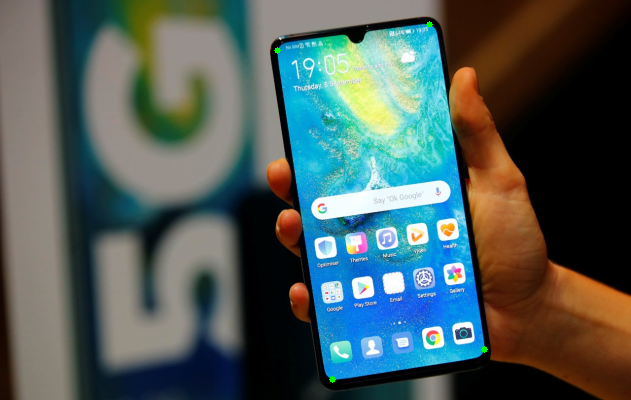

In [39]:
vertices = cv2.drawContours(image = image.copy(), contours = screen_contorus, contourIdx = -1, color = (0, 255, 0), thickness = 6)
cv2_imshow(vertices)

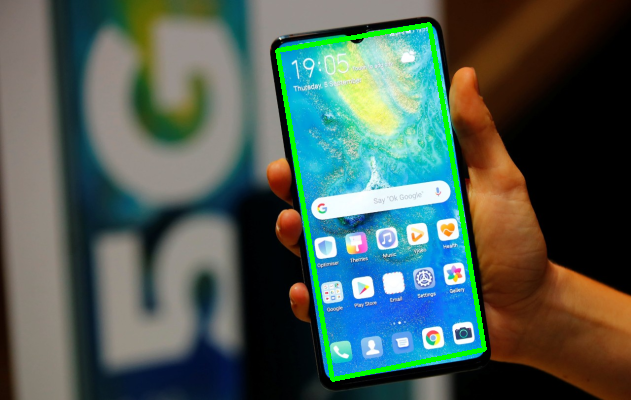

In [41]:
screen_contour = cv2.drawContours(image.copy(), [screen_contorus], -1, (0, 255, 0), 3)
cv2_imshow(screen_contour)